Step 1 : TO import the neccessary libraries, this library contains the inbuild code we need to use it by importing

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


from sklearn import linear_model

import warnings 
warnings.filterwarnings('ignore')

Step 2: TO load the data using the pandas library, since the data is in csv format we are using the "raed_csv" function

In [5]:
df=pd.read_csv("Project_surana.csv")

Step 3 : To do the initial inspection for the data , To do the " BUSINESS UNDERSTANDING "

In [6]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Amount in rupees
0,1,Male,19,15,39,1310.55
1,2,Male,21,15,81,1310.55
2,3,Female,20,16,6,1397.92
3,4,Female,23,16,77,1397.92
4,5,Female,31,17,40,1485.29


In [20]:
df.describe()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Amount in rupees
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000,5291.127200
std,0.497633,13.969007,26.264721,25.823522,2294.748688
min,0.000000,18.000000,15.000000,1.000000,1310.550000
25%,0.000000,28.750000,41.500000,34.750000,3625.855000
50%,0.000000,36.000000,61.500000,50.000000,5373.255000
75%,1.000000,49.000000,78.000000,73.000000,6814.860000
max,1.000000,70.000000,137.000000,99.000000,11969.690000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Genre                   200 non-null    object 
 2   Age                     200 non-null    int64  
 3   Annual Income (k$)      200 non-null    int64  
 4   Spending Score (1-100)  200 non-null    int64  
 5   Amount in rupees        200 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 9.5+ KB


Step 4 : Data preprocessing , We need to find if there are any null values associated to it, to do that we used the "isnull()"

In [7]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Amount in rupees          0
dtype: int64

Step 5 : TO drop the irrelavent columns

In [11]:
df=df.drop(columns=['CustomerID'])

In [12]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Amount in rupees
0,Male,19,15,39,1310.55
1,Male,21,15,81,1310.55
2,Female,20,16,6,1397.92
3,Female,23,16,77,1397.92
4,Female,31,17,40,1485.29


Step 6 : To convert the categorical data into the numerical data for better moves using the "LabelEncodeter"

In [15]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Genre'] = encoder.fit_transform(df['Genre'])  # Male = 1, Female = 0


In [16]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Amount in rupees
0,1,19,15,39,1310.55
1,1,21,15,81,1310.55
2,0,20,16,6,1397.92
3,0,23,16,77,1397.92
4,0,31,17,40,1485.29


In [121]:
df=df.drop(columns=['spending_score_scaled'])

STANDARDIZING THE SPENDING SCORE TO 0-1

from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Reshape if 'spending_score' is a 1D array
spending_score = df['Spending Score (1-100)'].values.reshape(-1, 1)

# Fit & transform the data
spending_score_scaled = scaler.fit_transform(spending_score)

# Convert back to DataFrame (if needed)
import pandas as pd
df["spending_score_scaled"] = spending_score_scaled


print(f"Min: {spending_score_scaled.min()}, Max: {spending_score_scaled.max()}")


In [122]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Amount in rupees,Cluster
0,1,19,15,39,1310.55,4
1,1,21,15,81,1310.55,2
2,0,20,16,6,1397.92,4
3,0,23,16,77,1397.92,2
4,0,31,17,40,1485.29,4


Step 7 : To separate the " Dependent and independent data "

In [136]:
X = df[['Genre', 'Age', 'Annual Income (k$)']]
y = df['Spending Score (1-100)']

Step 8 : To divide the data as training and testing data using the train_test_split

In [137]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 9 : To select the algorithem
      Here, we used the random forst algorithm thsi will create the n number of trees

In [138]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [139]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize KNN model
knn_model = KNeighborsRegressor(n_neighbors=3)  # You can tune 'n_neighbors'

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred_knn)



# Print results
print(f"KNN Regression Results:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")




KNN Regression Results:
Mean Absolute Error (MAE): 13.55


Step 10 : To find the accuracy

In [131]:
y_pred = model.predict(X_test)

In [140]:
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)


print(f"Mean Absolute Error: {mae}")



Mean Absolute Error: 12.340529166666666


In [157]:
new_data = [[1, 19, 15]]  # Gender: Male, Age: 25, Annual Income: 50000
predicted_score = model.predict(new_data)

print(f"Predicted Spending Score: {predicted_score[0]}")

Predicted Spending Score: 35.99


In [143]:
model= RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

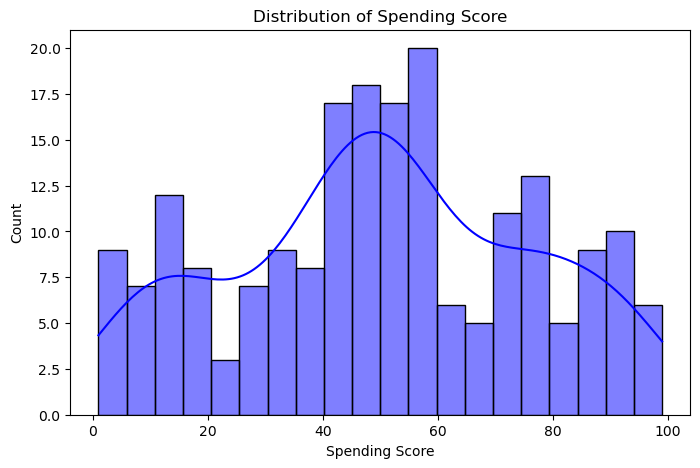

In [35]:
plt.figure(figsize=(8,5))
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, color='blue')
plt.title("Distribution of Spending Score")
plt.xlabel("Spending Score")
plt.ylabel("Count")
plt.show()


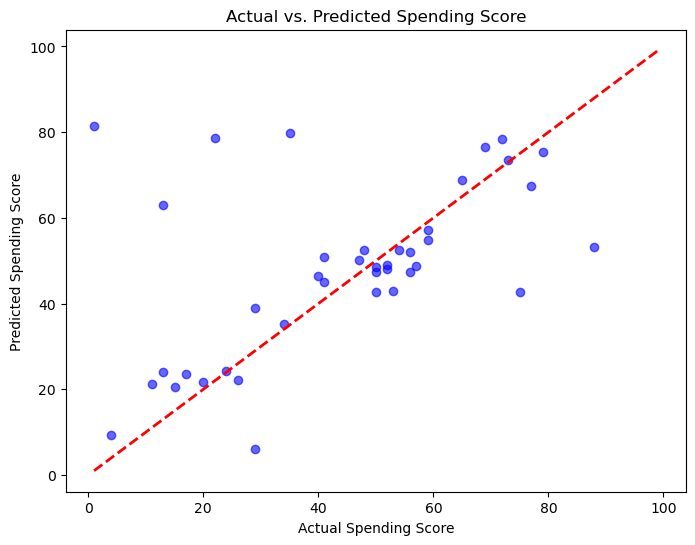

In [36]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)  # Perfect prediction line
plt.xlabel("Actual Spending Score")
plt.ylabel("Predicted Spending Score")
plt.title("Actual vs. Predicted Spending Score")
plt.show()


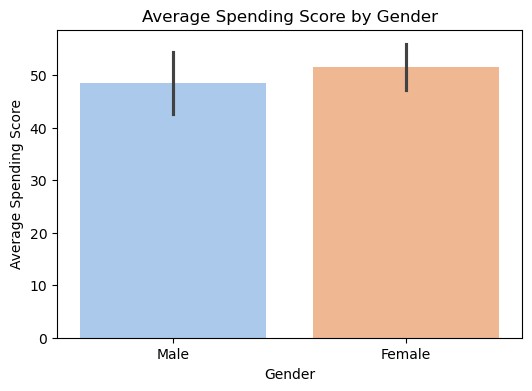

In [158]:
plt.figure(figsize=(6,4))
sns.barplot(x=df['Genre'].map({0: "Female", 1: "Male"}), y=df['Spending Score (1-100)'], estimator=np.mean, palette="pastel")
plt.title("Average Spending Score by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Spending Score")
plt.show()


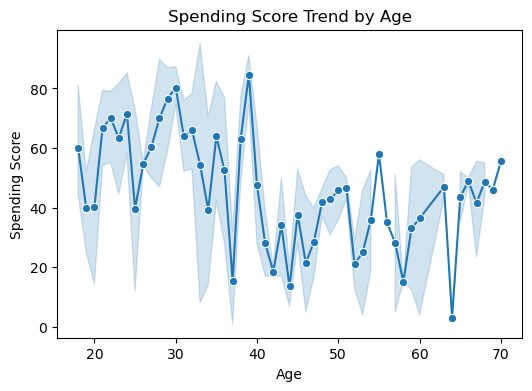

In [152]:
plt.figure(figsize=(6,4))
sns.lineplot(x=df['Age'], y=df['Spending Score (1-100)'], marker='o')
plt.title("Spending Score Trend by Age")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show()




Step : CReating fpor clusters

In [52]:
df1=pd.read_csv("Project_surana.csv")

In [53]:
z = df1[['Annual Income (k$)', 'Spending Score (1-100)']]

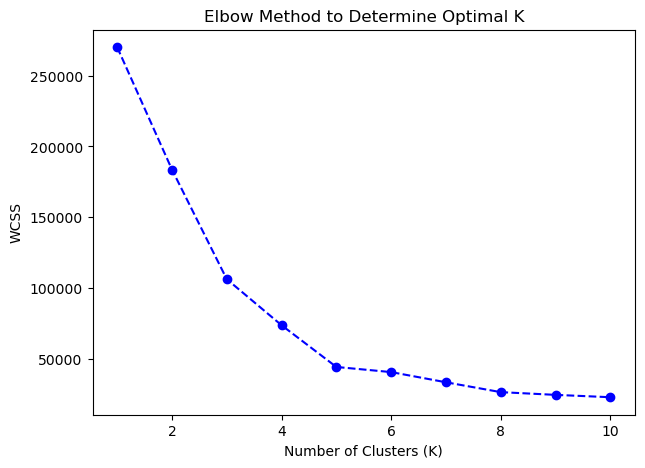

In [159]:
# Find the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares

for k in range(1, 11):  # Trying 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(z)
    wcss.append(kmeans.inertia_)  # Store WCSS for each k

# Plot the Elbow Curve
plt.figure(figsize=(7,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='blue')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method to Determine Optimal K")
plt.show()


In [160]:
# Apply K-Means with optimal clusters (let's assume K=5 based on the elbow method)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(z)  # Assign clusters to customers


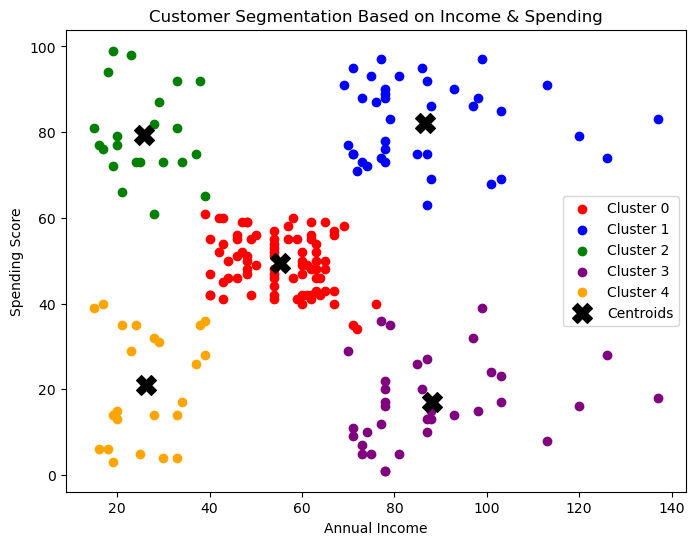

In [155]:
# Define colors for clusters
colors = ['red', 'blue', 'green', 'purple', 'orange']

plt.figure(figsize=(8,6))
for cluster in range(5):  # Assuming 5 clusters
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], 
                color=colors[cluster], label=f'Cluster {cluster}')

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            color='black', marker='X', s=200, label='Centroids')

plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customer Segmentation Based on Income & Spending")
plt.legend()
plt.show()
